<a href="https://www.kaggle.com/code/martaseidler/apple-quality-keras?scriptVersionId=166280995" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os, warnings

from tensorflow import keras
from tensorflow.keras import layers

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore")

2024-03-10 08:47:19.004941: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 08:47:19.005115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 08:47:19.163562: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [5]:
df.drop(4000, axis=0, inplace=True)

In [6]:
df['Acidity'] = df['Acidity'].astype('float64')

In [7]:
df = df.drop('A_id', axis=1)

In [8]:
df.Quality = (df.Quality == 'good').astype(int)
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [9]:
y = df.Quality  
X = df.drop('Quality', axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                   stratify=y, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5,
                                                   stratify=y_test, random_state=42)

print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)
print('X valid shape:', X_valid.shape)
print('y valid shape:', y_valid.shape)
print('X test shape:', X_test.shape)
print('y test shape:', y_test.shape)

X train shape: (2400, 7)
y train shape: (2400,)
X valid shape: (800, 7)
y valid shape: (800,)
X test shape: (800, 7)
y test shape: (800,)


In [11]:
X_train.shape[1]

7

In [12]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[7]),
    layers.Dense(8, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [14]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
)

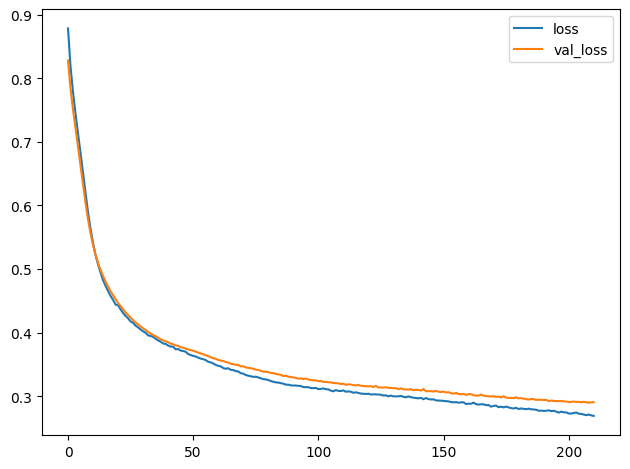

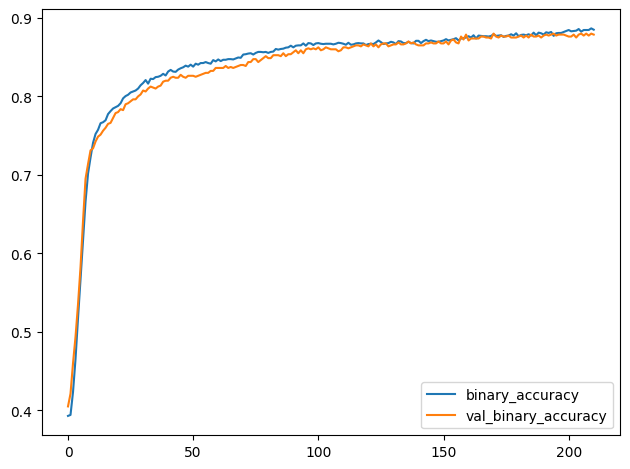

In [16]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [17]:
score, acc = model.evaluate(X_test, y_test)

print('Test score: ', score)
print('Test accuracy: ', acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8811 - loss: 0.2846 
Test score:  0.29013392329216003
Test accuracy:  0.8787500262260437


Neurons 4, batch_size 512: 
Test score:  0.39191803336143494
Test accuracy:  0.8100000023841858

Neurons 8, batch_size 512:
Test score:  0.28348061442375183
Test accuracy:  0.8737499713897705

Neurons 8, batch_size 128:
Test score:  0.22969654202461243
Test accuracy:  0.9075000286102295
